In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib notebook

from scipy import stats
import csv
import ast


## Functions

In [26]:

def uploadData(place,samples,people,shots):
    resultsTest=pd.read_csv(place+"_FeatureSet_1_startPerson_1_endPerson_1.csv")
    if len(resultsTest)!=samples:
        print('error'+' 1'+' 1')
        print(len(resultsTest))

    for i in range(2,people+1):
        auxFrame=pd.read_csv(place+"_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        if len(auxFrame)!=samples:
            print('error'+' 1 '+str(i))
            print(len(auxFrame))
    for j in range(2,4):
        for i in range(1,people+1):
            auxFrame=pd.read_csv(place+"_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
            resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)

            if len(auxFrame)!=samples:
                print('error'+' '+str(j)+' '+str(i))
                print(len(auxFrame))

    
    return resultsTest.drop(columns='Unnamed: 0')

def uploadDatabase(place,samples,people,shots,Classification=False):
    resultsTest=pd.read_csv(place+"_FeatureSet_1_startPerson_1_endPerson_1.csv")
    if len(resultsTest)!=samples:
        print('error'+' 1'+' 1')
        print(len(resultsTest))

    for i in range(2,people+1):
        auxFrame=pd.read_csv(place+"_FeatureSet_1_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
        resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)
        if len(auxFrame)!=samples:
            print('error'+' 1 '+str(i))
            print(len(auxFrame))
    for j in range(2,4):
        for i in range(1,people+1):
            auxFrame=pd.read_csv(place+"_FeatureSet_"+str(j)+"_startPerson_"+str(i)+"_endPerson_"+str(i)+".csv")
            resultsTest=pd.concat([resultsTest,auxFrame],ignore_index=True)

            if len(auxFrame)!=samples:
                print('error'+' '+str(j)+' '+str(i))
                print(len(auxFrame))

    
    return analysisResults(resultsTest.drop(columns='Unnamed: 0'),shots,Classification)


def analysisResults(resultDatabase,shots,Classification=False):
    results= pd.DataFrame(columns=['Feature Set', '# shots']) 
    timeM= pd.DataFrame(columns=[]) 

            
  
    idx=0
    for j in range(1,4):
        for i in range(1,shots+1):
            results.at[idx,'Feature Set']=j
            results.at[idx,'# shots']=i



            subset=str(tuple(range(1, i + 1)))



            LDAmulti=resultDatabase['AccLDAMulti'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            QDAmulti=resultDatabase['AccQDAMulti'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]

            if Classification:

                LDAInd=resultDatabase['AccClLDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                QDAInd=resultDatabase['AccClQDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL=resultDatabase['AccClLDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ=resultDatabase['AccClQDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ_L=resultDatabase['AccClLDAPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL_Q=resultDatabase['AccClQDAPropL'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                SVMInd=resultDatabase['AccClSVMInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                KNNInd=resultDatabase['AccClKNNInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuL=resultDatabase['AccClLDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuQ=resultDatabase['AccClQDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]

            else:
                LDAInd=resultDatabase['AccLDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                QDAInd=resultDatabase['AccQDAInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL=resultDatabase['AccLDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ=resultDatabase['AccQDAProp'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropQ_L=resultDatabase['AccLDAPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                PropL_Q=resultDatabase['AccQDAPropL'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                SVMInd=resultDatabase['AccSVMInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                KNNInd=resultDatabase['AccKNNInd'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuL=resultDatabase['AccLDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
                LiuQ=resultDatabase['AccQDALiu'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]


            wmL=resultDatabase['wTargetMeanLDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wmQ=resultDatabase['wTargetMeanQDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wcL=resultDatabase['wTargetCovLDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            wcQ=resultDatabase['wTargetCovQDAm'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            
            tPropQ=resultDatabase['tPropQ'].loc[(resultDatabase['subset'] == subset)&(resultDatabase['Feature Set'] == j)]
            tIndQ=resultDatabase['tCLPropQ'].loc[(resultDatabase['Feature Set'] == j)]
            tIndL=resultDatabase['tCLPropL'].loc[(resultDatabase['Feature Set'] == j)]

            

            results.at[idx,'LDA_Ind']=LDAInd.mean(axis=0)
            results.at[idx,'QDA_Ind']=QDAInd.mean(axis=0)
            results.at[idx,'SVM_Ind']=SVMInd.mean(axis=0)
    #                 results.at[idx,'SVM_PropQ']=SVMPropQ.mean(axis=0)
            results.at[idx,'KNN_Ind']=KNNInd.mean(axis=0)
            results.at[idx,'LDA_Multi']=LDAmulti.mean(axis=0)
            results.at[idx,'QDA_Multi']=QDAmulti.mean(axis=0)
    #                 results.at[idx,'SVM_Multi']=SVMmulti.mean(axis=0)
    #                 results.at[idx,'KNN_Multi']=KNNmulti.mean(axis=0)
            results.at[idx,'LiuL']=LiuL.mean(axis=0)
            results.at[idx,'LiuQ']=LiuQ.mean(axis=0)
#             results.at[idx,'PropL']=PropL.mean(axis=0)
            results.at[idx,'PropQ']=PropQ.mean(axis=0)
#             results.at[idx,'PropL_Q']=PropL_Q.mean(axis=0)
            results.at[idx,'PropQ_L']=PropQ_L.mean(axis=0)
    #                 results.at[idx,'PropKL']=PropKL.mean(axis=0)
    #                 results.at[idx,'PropKQ']=PropKQ.mean(axis=0)
    #                 results.at[idx,'PropSL']=PropSL.mean(axis=0)
    #                 results.at[idx,'PropSQ']=PropSQ.mean(axis=0)
            results.at[idx,'wmL']=wmL.mean(axis=0)
            results.at[idx,'wmQ']=wmQ.mean(axis=0)
            results.at[idx,'wcL']=wcL.mean(axis=0)
            results.at[idx,'wcQ']=wcQ.mean(axis=0)
            
            results.at[idx,'tPropQ']=tPropQ.mean(axis=0)
            results.at[idx,'tIndQ']=tIndQ.mean(axis=0)
            results.at[idx,'tIndL']=tIndL.mean(axis=0)
            results.at[idx,'std_tPropQ']=tPropQ.std(axis=0)
            results.at[idx,'std_tIndQ']=tIndQ.std(axis=0)
            results.at[idx,'std_tIndL']=tIndL.std(axis=0)


            results.at[idx,'stdLDA_Ind']=LDAInd.std(axis=0)
            results.at[idx,'stdQDA_Ind']=QDAInd.std(axis=0)
#             results.at[idx,'stdPropL']=PropL.std(axis=0)
            results.at[idx,'stdPropQ_L']=PropQ_L.std(axis=0)
#             results.at[idx,'stdPropL_Q']=PropL_Q.std(axis=0)
            results.at[idx,'stdPropQ']=PropQ.std(axis=0)
            results.at[idx,'stdLiuL']=LiuL.std(axis=0)
            results.at[idx,'stdLiuQ']=LiuQ.std(axis=0)



            confidence=0.05

            p=stats.wilcoxon(PropQ_L.values,LDAInd.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (LDA_Ind)']=p
            else:
                results.at[idx,'T-test (LDA_Ind)']=1

            p=stats.wilcoxon(PropQ.values,QDAInd.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (QDA_Ind)']=p
            else:
                results.at[idx,'T-test (QDA_Ind)']=1

            p=stats.wilcoxon(PropQ_L.values,LDAmulti.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (LDA_Multi)']=p
            else:
                results.at[idx,'T-test (LDA_Multi)']=1

            p=stats.wilcoxon(PropQ.values,QDAmulti.values,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                results.at[idx,'T-test (QDA_Multi)']=p
            else:
                results.at[idx,'T-test (QDA_Multi)']=1



            idx+=1
        
    return results

def graphWeights():
    Partition='Time'
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=1, ncols=3, sharey='row', figsize=(9, 3))
#     shot=np.arange(1,5)
    
    for Data in range(3):
        
        if Data==0:
            shot=np.arange(1,5)
            shots=5
            if Partition=='Time':
                results=resultsNina5T
            elif Partition=='Random':
                results=resultsNina5R   
            ax[Data].xaxis.set_ticks(np.arange(1, 4.1, 1))
            title='NinaPro5'
        elif Data==1:
            shot=np.arange(1,5)
            shots=5
            if Partition=='Time':
                results=resultsCoteT
            elif Partition=='Random':
                results=resultsCoteR 
            ax[Data].xaxis.set_ticks(np.arange(1, 4.1, 1))
            title='Cote-Allard'
        elif Data==2:
            shot=np.arange(1,5)
            shots=5
            if Partition=='Time':
                results=resultsEPNT
                shot=np.arange(1,26)
                shots=26
            elif Partition=='Random':
                results=resultsEPNR 
            ax[Data].xaxis.set_ticks(np.arange(1, 25.1, 6))
            title='EPN EC'
            
        wm=np.zeros(shots-1)
        wc=np.zeros(shots-1)
        
        
        for FeatureSet in range(FeatureSetM):  
            wm+=np.array(results['wmL'].loc[results['Feature Set']==FeatureSet+1])
            wm+=np.array(results['wmQ'].loc[results['Feature Set']==FeatureSet+1])
            wc+=np.array(results['wcL'].loc[results['Feature Set']==FeatureSet+1])
            wc+=np.array(results['wcQ'].loc[results['Feature Set']==FeatureSet+1])
                



        ax[Data].plot(shot,wm/6,label='Adaptive (mean)',marker='.',color='tab:blue')
        ax[Data].plot(shot,wc/6,label='Adaptive (covariance)',marker='^',color='tab:blue')
        ax[Data].plot(shot,np.ones(shots-1)*0.5,label='Liu',linestyle=':',color='tab:red')
        ax[Data].set_title(title)
        ax[Data].grid()
                
#     ax[2,0].set_xlabel('shots')
    ax[1].set_xlabel('repetitions')
    ax[0].set_ylabel('Target Person \n weight')
    ax[2].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
    fig.tight_layout(pad=0.1)
    plt.savefig("w.png", bbox_inches='tight', dpi=600)
    plt.show()



def graphACC(Partition):
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=3, ncols=6, sharey='row', figsize=(10, 6))
#     shot=np.arange(1,5)
    for classifier in range(2):
        for FeatureSet in range(FeatureSetM):
            for Data in range(FeatureSetM):
                if Data==0:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsNina5T
                    elif Partition=='Random':
                        results=resultsNina5R   
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.30, 1, .06))
                elif Data==1:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsCoteT
                    elif Partition=='Random':
                        results=resultsCoteR 
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.62, 1, 0.06))
                elif Data==2:
                    shot=np.arange(1,5)
                    if Partition=='Time':
                        results=resultsEPNT
                        shot=np.arange(1,26)
                    elif Partition=='Random':
                        results=resultsEPNR 
                    ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0.50, 1, 0.06))




                value=0.05

                if classifier == 0:

#                     Model='T-test (LDA_Ind)'                
#                     a=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
#                     markers_on = list(np.where(a <= value)[0])


                    Model='PropQ_L'       
                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Adaptive')


                    Model='LDA_Ind'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Individual',linestyle='-.')
                    
                    Model='LDA_Multi'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',linestyle='--')


                    Model='LiuL'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet].plot(shot,Y,label='Liu',linestyle=':')   


                 
                    
                    ax[Data,FeatureSet].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
                    
                    if len(shot)==25:
                        ax[Data,FeatureSet].xaxis.set_ticks([1,5,10,15,20,25])
                    else:
                    
                        ax[Data,FeatureSet].xaxis.set_ticks(np.arange(1,len(shot)+.2 , 1))
                    ax[Data,FeatureSet].grid()




                elif classifier == 1:

#                     Model='T-test (QDA_Ind)'                
#                     a=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
#                     markers_on = list(np.where(a <= value)[0])

                    Model='PropQ'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
#                     ax[Data,FeatureSet+3].plot(shot,Y,label='Adaptive')
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Adaptive')


                    Model='QDA_Ind'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Individual',linestyle='-.')
                    
                    Model='QDA_Multi'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Multi-user',linestyle='--')


                    Model='LiuQ'

                    Y=np.array(results[Model].loc[results['Feature Set']==FeatureSet+1])
                    ax[Data,FeatureSet+3].plot(shot,Y,label='Liu',linestyle=':')     
                    
                    
                    ax[Data,FeatureSet+3].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
                   
                    if len(shot)==25:
                        ax[Data,FeatureSet+3].xaxis.set_ticks([1,5,10,15,20,25])
                    else:                  
                        ax[Data,FeatureSet+3].xaxis.set_ticks(np.arange(1,len(shot)+.2 , 1))
                    ax[Data,FeatureSet+3].grid()



                
#     ax[2,0].set_xlabel('shots')
    ax[2,1].set_xlabel('repetitions')
#     ax[2,2].set_xlabel('shots')
    ax[0,0].set_title('\n \n 1')
    ax[0,1].set_title('LDA\n Feature Sets \n 2')
    ax[0,2].set_title('\n \n 3')
#     ax[2,3].set_xlabel('shots')
    ax[2,4].set_xlabel('repetitions')
#     ax[2,5].set_xlabel('shots')
    ax[0,3].set_title('\n \n 1')
    ax[0,4].set_title('QDA\n Feature Sets \n 2')
    ax[0,5].set_title('\n \n 3')
    ax[0,0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1,0].set_ylabel('Cote Allard\n\naccuracy')
    ax[2,0].set_ylabel('EPN EC\n\naccuracy')
    ax[0,5].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
#     ax[0,2].legend(loc='best',prop={'size': 7}) 
#     ax[1,2].legend(loc='best',prop={'size': 7}) 
#     ax[2,2].legend(loc='best',prop={'size': 7})  
    fig.tight_layout(pad=0.1)
    plt.savefig("fig1.png", bbox_inches='tight', dpi=600)
    plt.show()

    
def Analysis():

    s=1
    bases=['Cote','EPN','NinaPro5']
    confidence=0.05
    windows=['','295']




    # for w in windows:
    w='295'

    #     for methodCL in range(2):
    #         if methodCL==0:
    #             print('\n\n','Method 1 ' + w)
    #         else:
    #             print('\n\n','Method 2 ' + w)
    methodCL=0
    print('\n\n','Method '+str(methodCL)+' ' + w)
    for base in bases:
        print('\n\n',base)
        for s in range(1,5):
            if base=='EPN':
                samples=25
                people=30
                shots=4
            elif base=='Cote':
                samples=4
                people=17
                shots=4
            elif base=='NinaPro5':
                samples=4
                people=10
                shots=4

            place="Experiments/DatabasesEvaluation/Results/ResultsDatabases"+w+"/"+base
            DataFrame=uploadData(place,samples,people,shots)

            place="Experiments/CotePyTorchImplementation/Cote_CWT_"+base+"/"
            cote=pd.read_csv(place+"Pytorch_results_"+str(s)+"_cycles.csv",header=None)

            if methodCL==0:                
                propQ=DataFrame['AccQDAProp'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                propL=DataFrame['AccLDAProp'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                indQ=DataFrame['AccQDAInd'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                indL=DataFrame['AccLDAInd'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                liu=DataFrame['AccLDALiu'].loc[(DataFrame['Feature Set']==2)&(DataFrame['# shots']==s)].values*100
                liuF=DataFrame['AccLDALiu'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                if base=='NinaPro5':    
                    c=[]
                    for i in range(people):
                        c.append(np.array(ast.literal_eval(cote.loc[0][i])).T[0].mean())
                    c=np.array(c)
                elif base=='EPN':
                    c=[]
                    for i in range(20):
                        c.append(ast.literal_eval(cote.loc[0][i]))
                    c=np.mean(np.array(c),axis=0)
                elif base=='Cote':
                    c=[]
                    for i in range(20):
                        c.append(ast.literal_eval(cote.loc[0][i]))
                        c.append(ast.literal_eval(cote.loc[1][i]))
                    c=np.mean(np.array(c),axis=0)
            else:
                propQ=DataFrame['AccClQDAProp'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                propL=DataFrame['AccClLDAPropQ'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                indQ=DataFrame['AccClQDAInd'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                indL=DataFrame['AccClLDAInd'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100
                liu=DataFrame['AccClLDALiu'].loc[(DataFrame['Feature Set']==2)&(DataFrame['# shots']==s)].values*100
                liuF=DataFrame['AccClLDALiu'].loc[(DataFrame['Feature Set']==3)&(DataFrame['# shots']==s)].values*100                  
                if base=='NinaPro5':    
                    c=[]
                    for i in range(people):
                        c.append(np.array(ast.literal_eval(cote.loc[1][i])).T[0].mean())
                    c=np.array(c)
                elif base=='EPN':
                    c=[]
                    for i in range(20):
                        c.append(ast.literal_eval(cote.loc[1][i]))
                    c=np.mean(np.array(c),axis=0)
                elif base=='Cote':
                    c=[]
                    for i in range(20):
                        c.append(ast.literal_eval(cote.loc[2][i]))
                    c=np.mean(np.array(c),axis=0)           



            iL=np.mean(indL)
            iQ=np.mean(indQ)
            pL=np.mean(propL)
            pQ=np.mean(propL)
            co=np.mean(c)
            l=np.mean(liu)
            lF=np.mean(liuF)



    #         iL=np.median(indL)
    #         iQ=np.median(indQ)
    #         pL=np.median(propL)
    #         pQ=np.median(propL)
    #         co=np.median(c)
    #         l=np.median(liu)
    #         lF=np.median(liuF)

            print('\nshot: ',s)
    #             print('IndL:',round(iL,2),' PropL:',round(pL,2),' IndQ:',round(iQ,2)
    #                   ,' PropQ:',round(pQ,2),' Liu:',round(l,2),' Liu 3:',round(lF,2)
    #                    ,' Cote:',round(co,2))

            print(' PropL:',round(pL,2),' PropQ:',round(pQ,2),' Liu:',round(l,2) ,' Cote:',round(co,2))

            print('\n Analysis Wilcoxon')


    #             p=stats.wilcoxon(propL,indL,alternative='greater',zero_method='zsplit')[1]
    #             if p<confidence:
    #                 print('Acc PropL is better than Acc baseline (p<'+str(confidence)+')')
    #             elif pL>iL:
    #                 print('Acc PropL is better than Acc baseline')


            p=stats.wilcoxon(propL,liu,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                print('Acc PropL is better than Acc Liu(p<'+str(confidence)+')')
            elif pL>l:
                print('Acc PropL is better than Acc Liu')


            p=stats.wilcoxon(propL,c,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                print('Acc PropL is better than Acc Cote(p<'+str(confidence)+')')
            elif pL>co:
                print('Acc PropL is better than Acc Cote')




    #             p=stats.wilcoxon(propQ,indQ,alternative='greater',zero_method='zsplit')[1]
    #             if p<confidence:
    #                 print('\nAcc PropQ is better than Acc baseline (p<'+str(confidence)+')')
    #             elif pQ>iQ:
    #                 print('Acc PropQ is better than Acc baseline')


            p=stats.wilcoxon(propQ,liu,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                print('Acc PropQ is better than Acc Liu(p<'+str(confidence)+')')
            elif pQ>l:
                print('Acc PropQ is better than Acc Liu')


            p=stats.wilcoxon(propQ,c,alternative='greater',zero_method='zsplit')[1]
            if p<confidence:
                print('Acc PropQ is better than Acc Cote(p<'+str(confidence)+')')
            elif pQ>co:
                print('Acc PropQ is better than Acc Cote')





    #             p=stats.wilcoxon(propL,indL,alternative='greater',zero_method='zsplit')[1]
    #             if p<confidence:
    #                 print('Acc PropL is better than Acc LDA (p<'+str(confidence)+')')
    #             elif indL.mean()<propL.mean():
    #                 print('Acc PropL is better than Acc LDA')
    #             elif indL.mean()==propL.mean():
    #                 print('Acc PropL and Acc LDA are equals')
    # #             elif indL.mean()>propL.mean():
    # #                 print('Acc Prop is worse than Acc LDA')

    #             p=stats.wilcoxon(propQ,indQ,alternative='greater',zero_method='zsplit')[1]
    #             if p<confidence:
    #                 print('Acc PropQ is better than Acc QDA (p<'+str(confidence)+')')
    #             elif indL.mean()<propL.mean():
    #                 print('Acc PropQ is better than Acc QDA')
    #             elif indL.mean()==propL.mean():
    #                 print('Acc PropQ and Acc QDA are equals')
    # #             elif indQ.mean()>propQ.mean():
    # #                 print('Acc PropQ is worse than Acc QDA')

    #             print(stats.friedmanchisquare(propL,propQ,liu,c))



    
    
    
    
def graphIndividuals(classifier):
    FeatureSetM=3
    fig , ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey='row', figsize=(9, 6))
    shot=np.arange(1,5)
    for Data in range(FeatureSetM):
        if Data==0:
            resultsLDA=resultsNina5LDA
            resultsQDA=resultsNina5QDA
            resultsLDAnoPCA=resultsNina5LDAnoPCA
            resultsQDAnoPCA=resultsNina5QDAnoPCA
        elif Data==1:
            resultsLDA=resultsCoteLDA
            resultsQDA=resultsCoteQDA
            resultsLDAnoPCA=resultsCoteLDAnoPCA
            resultsQDAnoPCA=resultsCoteQDAnoPCA
        elif Data==2:
            resultsLDA=resultsEPNLDA
            resultsQDA=resultsEPNQDA
            resultsLDAnoPCA=resultsEPNLDAnoPCA
            resultsQDAnoPCA=resultsEPNQDAnoPCA
        for FeatureSet in range(FeatureSetM):
             
                       
                
            
            if classifier == 'LDA':
                
                

                Model='Acc(Few)'
                
                Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
                Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')

                
                


                Model='Acc(PK+Few)'
                Y=np.array(resultsLDAnoPCA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
                Y=np.array(resultsLDA[Model].loc[resultsLDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')

                
                

            elif classifier == 'QDA':

                Model='Acc(Few)'
                Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Individual',marker='x',color='red')
                
                Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Individual',marker='o',color='blue')            

                
                     


                Model='Acc(PK+Few)'
                Y=np.array(resultsQDAnoPCA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='Multi-user',marker='x',color='red',linestyle=':')
                
                Y=np.array(resultsQDA[Model].loc[resultsQDA['Feature Set']==FeatureSet+1])
                ax[Data,FeatureSet].plot(shot,Y,label='PCA_Multi-user',marker='o',color='blue',linestyle=':')            

                
                



                     
        
            ax[Data,FeatureSet].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            ax[Data,FeatureSet].grid()
#             ax[Data,FeatureSet].yaxis.set_ticks(np.arange(0, 2, 1))
            ax[Data,FeatureSet].xaxis.set_ticks(np.arange(1,4.2 , 1))
    ax[2,0].set_xlabel('shots')
    ax[2,1].set_xlabel('shots')
    ax[2,2].set_xlabel('shots')
    ax[0,0].set_title('Feature Set 1')
    ax[0,1].set_title('Feature Set 2')
    ax[0,2].set_title('Feature Set 3')
    ax[0,0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1,0].set_ylabel('Cote Allard\n\naccuracy')
    ax[2,0].set_ylabel('EPN EC\n\naccuracy')
    ax[0,2].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
#     ax[0,2].legend(loc='best',prop={'size': 7}) 
#     ax[1,2].legend(loc='best',prop={'size': 7}) 
#     ax[2,2].legend(loc='best',prop={'size': 7})  
    fig.tight_layout(pad=0.1)
    
    plt.show()

def labelPoint(xs,ys,ax1):
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-5), # distance from text to points (x,y)
                     ha='center',
                    fontsize='small') # horizontal alignment can be left, right or center

def labelPointA(xs,ys,ax1,std):
    idx=0
    for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)
        stdi = "{:.2f}".format(std[idx])

        ax1.annotate(label+'±'+str(stdi), # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,-5), # distance from text to points (x,y)
                     ha='center',
                    fontsize='small') # horizontal alignment can be left, right or center
        idx+=1


def graphsDatabases():
    FeatureSetM=3
    shot=np.arange(1,5)
    
    for Data in range(FeatureSetM):
        if Data==0:
            resultsLDA=resultsNina5LDAnoPCA       
            resultsQDA=resultsNina5QDA
            fig1 , ax = plt.subplots(nrows=4, ncols=3,sharex=True, sharey='row',  figsize=(9, 7))
            ModelTxt='NinaPro5'
            start=0.45
            end=0.7
            step=0.05
        elif Data==1:
            resultsLDA=resultsCoteLDAnoPCA 
            resultsQDA=resultsCoteQDA
            fig2 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
            ModelTxt='Cote Allard'
            start=0.83
            end=1
            step=0.05
        elif Data==2:
            resultsLDA=resultsEPNLDAnoPCA
            resultsQDA=resultsEPNQDA
            fig3 , ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(9, 7))
            ModelTxt='EPN EC'
            start=0.84
            end=1
            step=0.05
        for F in range(FeatureSetM):
            FeatureSet=F+1

            yPropLDA=np.array(resultsLDA['Acc(Prop)'].loc[resultsLDA['Feature Set']==FeatureSet])
            yLiu=np.array(resultsLDA['Acc(Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
            yLDA=np.array(resultsLDA['Acc(Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             yLDApk=np.array(resultsLDA['Acc(PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])

            yPropQDA=np.array(resultsQDA['Acc(Prop)'].loc[resultsQDA['Feature Set']==FeatureSet])
            yLiuQ=np.array(resultsQDA['Acc(Liu_QDA)'].loc[resultsQDA['Feature Set']==FeatureSet])
            yQDA=np.array(resultsQDA['Acc(Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             yQDApk=np.array(resultsQDA['Acc(PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])



#             wPropLDA=np.array(resultsLDA['wMeanLDA'].loc[resultsLDA['Feature Set']==FeatureSet])
#             wPropQDA=np.array(resultsQDA['wMeanQDA'].loc[resultsQDA['Feature Set']==FeatureSet])
#             wLiu=np.ones(4)*0.5

            
            tT_PropBlLDA=np.array(resultsLDA['T-test (Prop_Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
            tT_PropBlQDA=np.array(resultsQDA['T-test (Prop_Few)'].loc[resultsQDA['Feature Set']==FeatureSet])
            tT_PropLiuLDA=np.array(resultsLDA['T-test (Prop_Liu)'].loc[resultsLDA['Feature Set']==FeatureSet])
            tT_PropLiuQDA=np.array(resultsQDA['T-test (Prop_Liu)'].loc[resultsQDA['Feature Set']==FeatureSet])
#             tT_PropPkLDA=np.array(resultsLDA['T-test (Prop_PK+Few)'].loc[resultsLDA['Feature Set']==FeatureSet])
#             tT_PropPkQDA=np.array(resultsQDA['T-test (Prop_PK+Few)'].loc[resultsQDA['Feature Set']==FeatureSet])







            

            ax[0,F].plot(shot, yPropLDA, label='Adaptive',marker='^',color='green')
#             labelPoint(shot,yPropLDA,ax[0,F])
            
            ax[0,F].plot(shot, yLDA, label='BL: Individual',marker='x',color='red')
#             labelPoint(shot,yLDA,ax[0,F])
#             ax[0,F].plot(shot, yLiu, label='Liu',marker='v',color='orange')
#             labelPoint(shot,yLiu,ax[0,F])
#             ax[0,F].plot(shot, yLDApk, label='BL (PK+Few)',marker='^',color='red')
#             labelPoint(shot,yLDApk,ax[0,F])
#             ax[0,F].yaxis.set_ticks(np.arange(start, end, step))
            ax[0,F].grid()
            ax[0,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
#             ax2 = ax[0,F].twinx()
            ax[1,F].plot(shot, tT_PropBlLDA, label='H0 (Adaptive-BL)',marker='x',color='red')
#             ax[1,F].plot(shot, tT_PropLiuLDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
#             ax2.plot(shot, tT_PropPkLDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
            ax[1,F].set_ylim([-0.1, 1.1])
            ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
            ax[1,F].grid()
            if F<=1:
                ax[1,F].set_yticklabels([])
            if F==2:
#                 ax[1,F].set_ylabel('Null Hypothesis')
                ax[1,F].yaxis.set_ticks(np.arange(0, 2, 1))
                ax[1,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)

            
            
            
            
#             ax[1,F].plot(shot, 1-wPropLDA , label='w (Proposed)',color='green')
# #             labelPoint(shot,1-wPropLDA,ax[1,F])
# #             ax[1,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
#             ax[1,F].grid()
#             ax[1,F].set_ylim([0.05, 0.55])
#             ax[1,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
            
            
            

            ax[2,F].plot(shot, yPropQDA, label='Adaptive',marker='o',color='green')
#             labelPoint(shot,yPropQDA,ax[2,F])
            ax[2,F].plot(shot, yQDA, label='BL: PCA_Individual',marker='o',color='blue')
#             labelPoint(shot,yQDA,ax[2,F])
#             ax[2,F].plot(shot, yLiuQ, label='Liu',marker='v',color='orange')
#             labelPoint(shot,yLiuQ,ax[2,F])
            
#             ax[2,F].plot(shot, yQDApk, label='BL (PK+Few)',marker='^',color='red')
#             labelPoint(shot,yQDApk,ax[2,F])
            
#             ax[2,F].yaxis.set_ticks(np.arange(start, end, step))
            ax[2,F].grid()
            ax[2,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        
            
#             ax3 = ax[1,F].twinx()
            ax[3,F].plot(shot, tT_PropBlQDA, label='H0 (Adaptive-BL)',marker='o',color='blue')
#             ax[3,F].plot(shot, tT_PropLiuQDA, label='H0 (Adaptive-Liu)',marker='v',color='orange')
            
#             ax3.plot(shot, tT_PropPkQDA, label='H (Adapt_PK+Few)', linestyle='-.',color='red',marker='^')
            ax[3,F].set_ylim([-0.1, 1.1])
            ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%1d'))
            ax[3,F].grid()
            if F<=1:
                ax[3,F].set_yticklabels([])
            if F==2:
#                 ax[3,F].set_ylabel('Null hypothesis')
                ax[3,F].yaxis.set_ticks(np.arange(0, 2, 1))
                ax[3,F].legend(bbox_to_anchor=(1.23, 0.6), loc='upper left', borderaxespad=0.)
            
            
            
                
            
#             ax[3,F].plot(shot, 1-wPropQDA , label='w (Proposed)',color='green')
# #             labelPoint(shot,1-wPropQDA,ax[3,F])
# #             ax[3,F].plot(shot, wLiu, label='w (Liu)', linestyle=':',marker='s')
#             ax[3,F].grid()
#             ax[3,F].set_ylim([0.05, 0.55])
#             ax[3,F].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
            
            
            
        
        
        
        ax[0,0].set_ylabel('LDA\n\naccuracy')
        ax[1,0].set_ylabel('LDA\n\nnull hypothesis')
        ax[2,0].set_ylabel('QDA\n\naccuracy')
        ax[3,0].set_ylabel('QDA\n\nnull hypothesis')
        ax[1,0].set_xlabel('shots')
        ax[1,1].set_xlabel('shots')
        ax[1,2].set_xlabel('shots')
        ax[0,0].set_title('Feature Set 1')
#         ax[0,1].set_title(ModelTxt+'\n\nFeature 2')
        ax[0,1].set_title('Feature Set 2')
        ax[0,2].set_title('Feature Set 3')
        ax[0,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[1,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[2,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
        ax[3,2].legend(bbox_to_anchor=(1.23, 1), loc='upper left', borderaxespad=0.)
#         ax[2,2].legend(loc='lower right',prop={'size': 7})
#         ax[3,2].legend(loc='center right',prop={'size': 7})
        
    fig1.tight_layout(pad=0.4)
    fig2.tight_layout(pad=0.4)
    fig3.tight_layout(pad=0.4)
    plt.show()

    
    
def graphScientLiterat():
    
    fig , ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(9, 8))
    shot=np.arange(1,5)
    for Database in range(3):
        if Database==0:
            proposedLDA=np.array(resultsNina5LDAnoPCA['Acc(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsNina5QDA['Acc(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
            liu=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
            STDproposedLDA=np.array(resultsNina5LDAnoPCA['Std(Prop)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsNina5QDA['Std(Prop)'].loc[resultsNina5QDA['Feature Set']==3])
            STDliu=np.array(resultsNina5LDAnoPCA['Std(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==2])
    #             liuLDA=np.array(resultsNina5LDAnoPCA['Acc(Liu)'].loc[resultsNina5LDAnoPCA['Feature Set']==3])
            cote=np.array([0.4941,0.6012,0.6516,0.6898])
            STDcote=np.array([0.0582,0.0479,0.0446,0.0409])
        elif Database==1:
            proposedLDA=np.array(resultsCoteLDAnoPCA['Acc(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsCoteQDA['Acc(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
            liu=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
            STDproposedLDA=np.array(resultsCoteLDAnoPCA['Std(Prop)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsCoteQDA['Std(Prop)'].loc[resultsCoteQDA['Feature Set']==3])
            STDliu=np.array(resultsCoteLDAnoPCA['Std(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==2])
    #             liuLDA=np.array(resultsCoteLDAnoPCA['Acc(Liu)'].loc[resultsCoteLDAnoPCA['Feature Set']==3])
            cote=np.array([0.9469,0.9663,0.9782,0.9831])
            STDcote=np.array([0.0558,0.0454,0.0241,0.0216])
        elif Database==2:
            proposedLDA=np.array(resultsEPNLDAnoPCA['Acc(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            proposedQDA=np.array(resultsEPNQDA['Acc(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
            liu=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])
            liuLDA=np.array(resultsEPNLDAnoPCA['Acc(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            STDproposedLDA=np.array(resultsEPNLDAnoPCA['Std(Prop)'].loc[resultsEPNLDAnoPCA['Feature Set']==3])
            STDproposedQDA=np.array(resultsEPNQDA['Std(Prop)'].loc[resultsEPNQDA['Feature Set']==3])
            STDliu=np.array(resultsEPNLDAnoPCA['Std(Liu)'].loc[resultsEPNLDAnoPCA['Feature Set']==2])





#         ax.errorbar(shot, proposedLDA, yerr=STD, uplims=True, lolims=True, label='Proposed LDA')
    
        
      
        
        ax[Database].errorbar(shot,proposedLDA,label='Proposed_LDA_3',marker='^',color='green')
#         labelPointA(shot,proposedLDA,ax[Database],STDproposedLDA)
        ax[Database].errorbar(shot,proposedQDA,label='Proposed_QDA_3',marker='o',color='green')
#         labelPointA(shot,proposedQDA,ax[Database],STDproposedQDA)
        ax[Database].errorbar(shot,liu,label='Liu',marker='v',color='orange')
#         labelPointA(shot,liu,ax[Database],STDliu)
#         ax[Database].plot(shot,liuLDA,label='Liu_LDA_3',marker='+')
#         labelPoint(shot,liuLDA,ax[Database])
        
        if Database != 2:
            ax[Database].errorbar(shot,cote,label='Cote Allard',marker='*',color='brown')
#             labelPointA(shot,cote,ax[Database],STDcote)
                          
        
        ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
        ax[Database].grid()
        ax[Database].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)
    ax[2].set_xlabel('shots')
    ax[0].set_ylabel('NinaPro5\n\naccuracy')
    ax[1].set_ylabel('Cote Allard\n\naccuracy')
    ax[2].set_ylabel('EPN EC\n\naccuracy')
    fig.tight_layout(pad=0.1)
    plt.show()

    
def graphTime(timeNina5,timeCote,timeEPN):
    
    timeNina5=timeNina5.reset_index(drop=True)
    timeCote=timeCote.reset_index(drop=True)
    timeEPN=timeEPN.reset_index(drop=True)
    fig , ax = plt.subplots(nrows=6, ncols=3, figsize=(9, 8))
    shot=np.arange(1,5)
    for Database in range(3):
        if Database==0:
            data=timeNina5        
        elif Database==1:
            data=timeCote
        elif Database==2:
            data=timeEPN




      
        mu=np.array(data['meanL'].loc[0])
        sigma=np.array(data['varL'].loc[0])
        x = np.linspace(mu - mu, mu + sigma, 100)
        ax[(Database+1)*2-2,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanL'].loc[1])
        sigma=np.array(data['varL'].loc[1])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-2,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanL'].loc[2])
        sigma=np.array(data['varL'].loc[2])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-2,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[0])
        sigma=np.array(data['varQ'].loc[0])
        x = np.linspace(mu - mu, mu + sigma, 100)
        ax[(Database+1)*2-1,0].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[1])
        sigma=np.array(data['varQ'].loc[1])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-1,1].plot(x, stats.norm.pdf(x, mu, sigma))
        
        mu=np.array(data['meanQ'].loc[2])
        sigma=np.array(data['varQ'].loc[2])
        x = np.linspace(mu - sigma, mu + sigma, 100)
        ax[(Database+1)*2-1,2].plot(x, stats.norm.pdf(x, mu, sigma))
        
        
        
        
        
        
        
        
          
        
#         ax[Database].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
#         ax[Database].xaxis.set_ticks(np.arange(1,4.2 , 1))
#         ax[Database].grid()
#     ax[,0].legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

    ax[0,0].set_title('Adaptive')
    ax[0,1].set_title('BL: Individual')
    ax[0,2].set_title('BL: Multi-user')
    ax[5,0].set_xlabel('Time')
    ax[5,1].set_xlabel('Time')
    ax[5,2].set_xlabel('Time')
    ax[0,0].set_ylabel('NinaPro5\nLDA')
    ax[1,0].set_ylabel('NinaPro5\nQDA')
    ax[2,0].set_ylabel('Cote\nLDA')
    ax[3,0].set_ylabel('Cote\nQDA')
    ax[4,0].set_ylabel('EPN\nLDA')
    ax[5,0].set_ylabel('EPN\nQDA')
    
    fig.tight_layout(pad=0.1)
    plt.show()



## Graphs

**Feature Set 1:**
1. Mean absolute value (MAV)

**Feature Set 2:**

1. Mean absolute value (MAV)
2. Waveform length (WL)
3. Zero Crossing (ZC)
4. Slope sign change (SSC)

**Feature Set 3:**

1. L-scale (LS)
2. Maximum fractal length (MFL)
3. Mean of the square root (MSR)
4. Willison amplitude (WAMP)

### Analysis of the Baselines

Baselines are the classifiers LDA and QDA which are trained using 4 different training sets:

1. Principal component analysis and few shots **(PCA_Few)**
2. Few shots **(Few)**
3. Principal component analysis and few shots + Prior knowledge **(PCA_Few+PK)**
4. Few shots + Prior knowledge **(Few+PK)**

### 260ms window and 235ms overlap

### NinaPro5

In [7]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
samplesPerFile=4
people=10
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases/NinaPro5"
resultsNina5T=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsNina5T[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


### Upload Cote Allard

In [9]:
samplesPerFile=4
people=17
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases/Cote"
resultsCoteT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsCoteT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


### Upload EPN

In [10]:
samplesPerFile=25
people=30
shots=25
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases/EPN"
resultsEPNT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsEPNT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


<IPython.core.display.Javascript object>


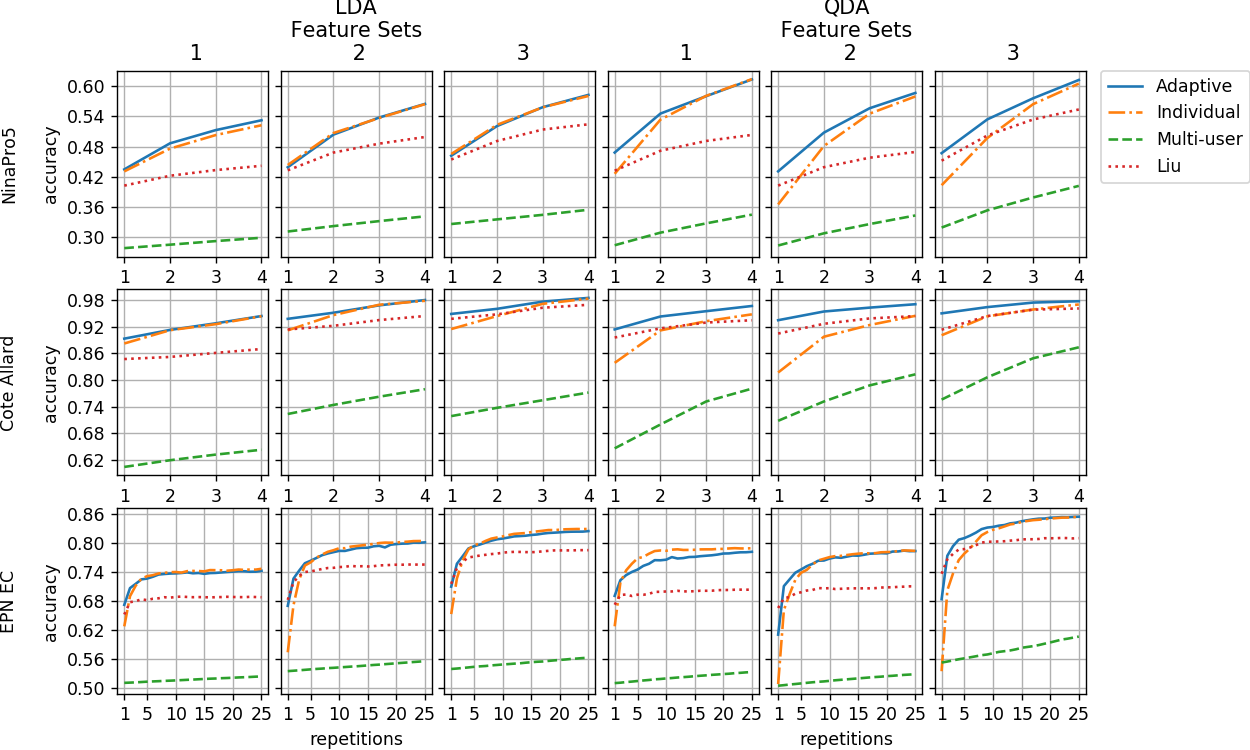

In [11]:
graphACC('Time')

<IPython.core.display.Javascript object>


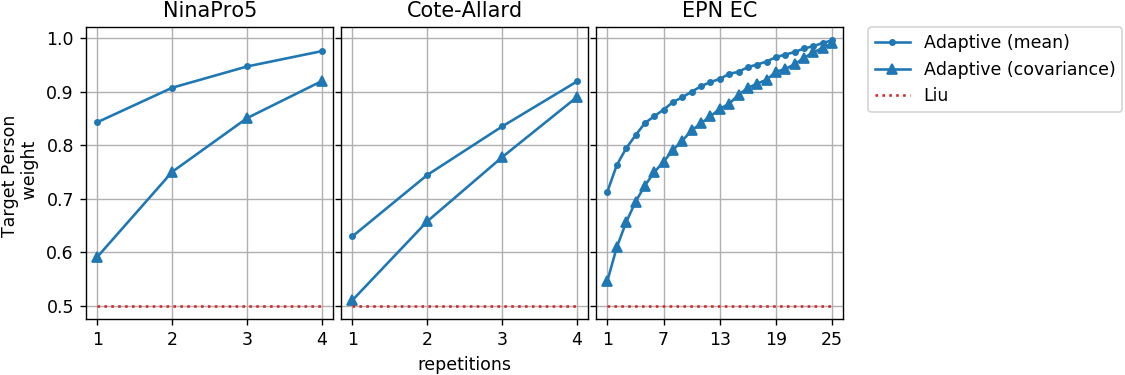

In [16]:
graphWeights()

### 295ms window and 290ms overlap

### NinaPro5

In [17]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
samplesPerFile=4
people=10
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases295/NinaPro5"
resultsNina5T=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsNina5T[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


### Upload Cote Allard

In [18]:
samplesPerFile=4
people=17
shots=4
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases295/Cote"
resultsCoteT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsCoteT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


### Upload EPN

In [19]:
samplesPerFile=25
people=30
shots=25
Classification=False
place="Experiments/DatabasesEvaluation/Results/ResultsDatabases295/EPN"
resultsEPNT=uploadDatabase(place,samplesPerFile,people,shots,Classification)
# resultsEPNT[['# shots','LDA_Ind','PropQ_L','stdPropQ_L','T-test (LDA_Ind)','LiuL','stdLiuL','QDA_Ind','PropQ','stdPropQ','T-test (QDA_Ind)','LiuQ','stdLiuL','SVM_Ind','KNN_Ind','tPropQ','tIndQ','tIndL','std_tPropQ','std_tIndQ','std_tIndL']]


<IPython.core.display.Javascript object>


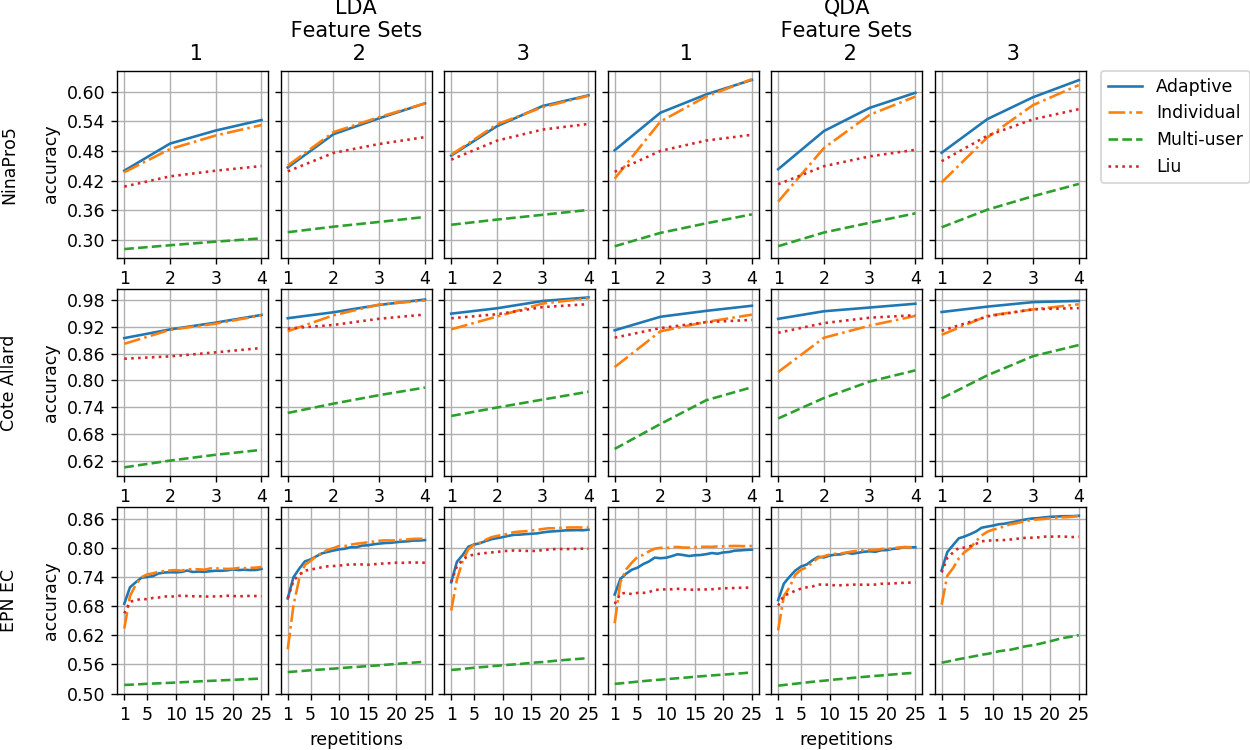

In [20]:
graphACC('Time')

<IPython.core.display.Javascript object>


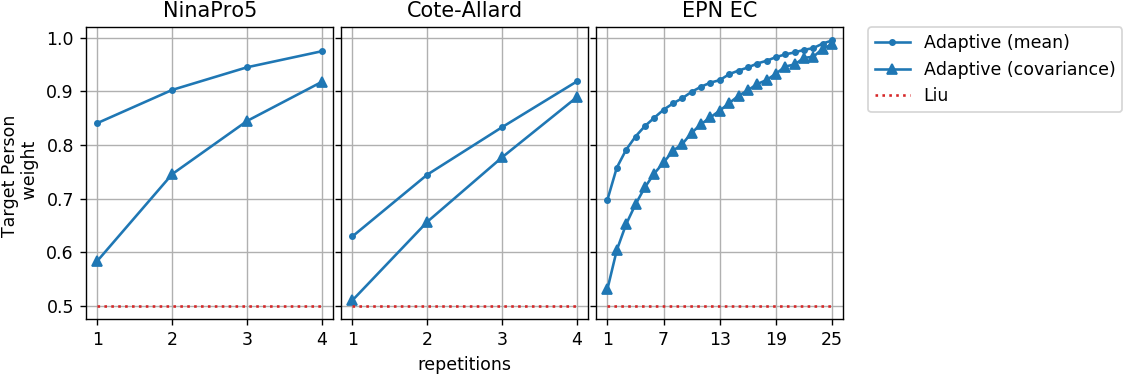

In [21]:
graphWeights()

# Statistical Analysis of the results

In [27]:
Analysis()



 Method 0 295


 Cote

shot:  1
 PropL: 94.79  PropQ: 94.79  Liu: 91.57  Cote: 94.08

 Analysis Wilcoxon
Acc PropL is better than Acc Liu(p<0.05)
Acc PropL is better than Acc Cote
Acc PropQ is better than Acc Liu(p<0.05)
Acc PropQ is better than Acc Cote

shot:  2
 PropL: 96.23  PropQ: 96.23  Liu: 92.39  Cote: 96.15

 Analysis Wilcoxon
Acc PropL is better than Acc Liu(p<0.05)
Acc PropL is better than Acc Cote
Acc PropQ is better than Acc Liu(p<0.05)
Acc PropQ is better than Acc Cote

shot:  3
 PropL: 97.83  PropQ: 97.83  Liu: 93.77  Cote: 97.62

 Analysis Wilcoxon
Acc PropL is better than Acc Liu(p<0.05)
Acc PropL is better than Acc Cote
Acc PropQ is better than Acc Liu(p<0.05)
Acc PropQ is better than Acc Cote

shot:  4
 PropL: 98.53  PropQ: 98.53  Liu: 94.7  Cote: 98.21

 Analysis Wilcoxon
Acc PropL is better than Acc Liu(p<0.05)
Acc PropL is better than Acc Cote
Acc PropQ is better than Acc Liu(p<0.05)
Acc PropQ is better than Acc Cote


 EPN

shot:  1
 PropL: 71.81  PropQ: 71.81 